In [43]:
# this code will hide the coding cells..
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [131]:
# import 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML
from scipy import stats
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from datetime import datetime
df = pd.read_csv('c:/users/nanot/webscraping/scrapy/jre/data_clean/jre2_clean.csv')

In [132]:
# a few cleaning bits..
# change the name of the tag, 'atheletes-fighters-martial-arts' to something else...
df['tag'] = df.tag.str.replace('athletes-fighters-martial-arts', 'athletes-fighters')
# get rid of the episode number from the title
df['ep_title'] = df.ep_title.str.replace('\\#\d{1,4}- ', '')
# drop 'best of' episodes, episodes less than 55 min, and fight companion episodes..
mask1 = ~df.ep_title.str.contains('Best of')
mask2 = df.runtime > 55
mask3 = ~df.ep_title.str.contains('Fight Companion')
df = df[mask1&mask2&mask3]

# change the date format using pd.to_datetime(), and then set the airdate as index.
df['airdate'] = pd.to_datetime(df.airdate)
df = df.set_index('airdate')

# create two separate data frames: 1 with no tag column, and one with tag column.  Then drop the duplicates from the dataframe
dft = df.copy()
df = df.drop('tag', axis = 1)
df = df.drop_duplicates()



In [133]:
# define masks for the data
# masks for the outliers of tagless df
s = 3
mask_outliers_views = (np.abs(stats.zscore(df.views)) > s)
mask_outliers_runtime = (np.abs(stats.zscore(df.runtime)) > s)
mask_outliers_likes = (np.abs(stats.zscore(df.likes)) > s)
mask_outliers_dislikes = (np.abs(stats.zscore(df.dislikes)) > s)
mask_outliers_ratio = (np.abs(stats.zscore(df.ratio)) > s)
# masks for the outliers of df with tags
tmask_outliers_views = (np.abs(stats.zscore(dft.views)) > s)
tmask_outliers_runtime = (np.abs(stats.zscore(dft.runtime)) > s)
tmask_outliers_likes = (np.abs(stats.zscore(dft.likes)) > s)
tmask_outliers_dislikes = (np.abs(stats.zscore(dft.dislikes)) > s)
tmask_outliers_ratio = (np.abs(stats.zscore(dft.ratio)) > s)
# combos for both dfs
mask_or = ~mask_outliers_views & ~mask_outliers_likes & ~mask_outliers_dislikes & ~mask_outliers_ratio # outlier removal mask
tmask_or = ~tmask_outliers_views & ~tmask_outliers_likes & ~tmask_outliers_dislikes & ~tmask_outliers_ratio # outlier removal mask for tag df

#create time slice for last 2 years..
#dft_2ys = dft['2017-06':'2019-06']


Analysis of The Joe Rogan Experience Podcast

Intro:
The Joe Rogan Experience is a popular and unusually structured podcast in which guests sit and casually converse with its host, Joe Rogan.  Being that the show takes on different flavor depending on the guest, I thought it may be interesting to see if there are any obvious statistical differences amongst the many categories that may describe each episode.  But first, I wanted to take a general look at the data collected.

Dataset:
The dataset was scraped from JREpodcast.com--a third-party fan-made website with video links to every episode.  Nearly all entries included data such as title (which includes the guest), duration, number of views, number of likes, number of dislikes, and ratio.  This information wasn't too hard to scrape, but what I really wanted was the category, which proved to be more chanllenging to obtain.  When the scrape was complete, I had two datasets to clean: one with categories and one without.

Results

In [158]:
df.sample(10)

,ep,ep_title,runtime,views,likes,dislikes,ratio
airdate,,,,,,,
2017-12-29,1058.0,Nina Teicholz,78.32,741014,8892,1619,5.49
2018-07-12,1143.0,Candice Thompson,108.02,924252,8107,5788,1.40
2019-03-07,1259.0,David Wallace-Wells,113.58,1158346,14082,9616,1.46
2015-10-27,713.0,Dave Rubin,180.23,429829,6267,396,15.83
2019-06-21,NaN,Swapcast Podcast On A Plane with John Dudley (...,85.70,256761,2570,333,7.72
2014-10-13,560.0,Anthony Cumia,179.40,392663,3403,282,12.07
2018-10-26,47.0,Tyson Fury,73.67,2717309,59899,1238,48.38
2018-10-01,1177.0,Sober October 2,187.62,2506191,28109,1824,15.41
2015-05-26,652.0,Ricky Schroder,96.33,116605,898,439,2.05


In [159]:
dft.sample(10)

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2014-05-12,498.0,Aubrey Marcus,writers,178.92,147814,1664,98,16.98
2015-12-11,734.0,Brendan Schaub,comedians,169.90,437670,3293,209,15.76
2014-07-17,522.0,CJ Werleman,authors,171.03,103511,923,489,1.89
2014-08-25,539.0,Cara Santa Maria,journalists,118.27,156203,1488,260,5.72
2019-01-12,1223.0,Greg Fitzsimmons,comedians,199.13,1220227,11759,1217,9.66
2014-07-18,523.0,Jim Norton,authors,162.10,218224,1771,126,14.06
2018-06-06,1127.0,Jesse Itzler,business,107.18,789480,9269,700,13.24
2014-10-10,559.0,Keith Weber,athletes-fighters,118.07,88538,739,43,17.19
2013-01-16,298.0,Dennis McKenna,comedians,159.00,233586,2148,112,19.18


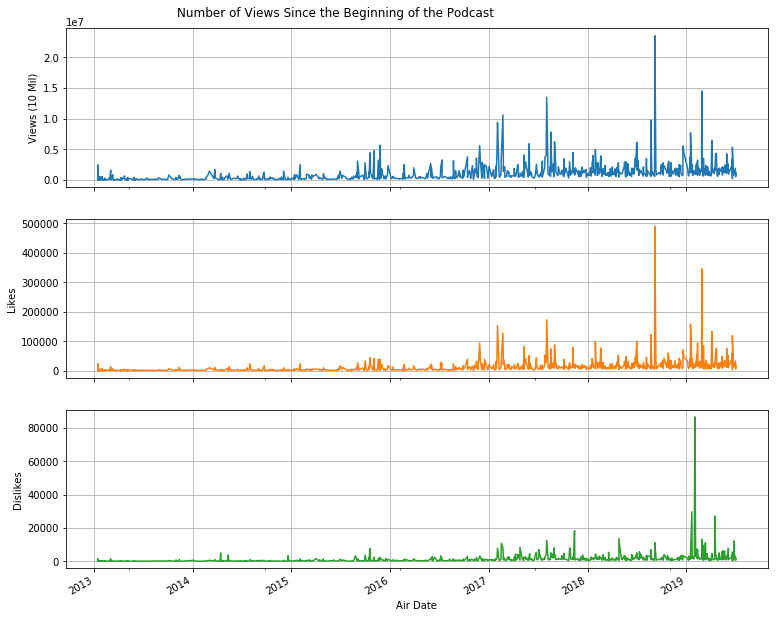

In [134]:
# plot time series of views
# need to format the plot.  label y axis, and get more tick marks, maybe...
cols = ['views', 'likes', 'dislikes']
ylabels = ['Views (10 Mil)', 'Likes', 'Dislikes']
axes = df[cols].plot(title = 'Number of Views Since the Beginning of the Podcast', figsize=(15,10), subplots = True, legend = False, grid = True)
# There are a few spikes that are interesting.  Who are these people receving so many views?
plt.subplots_adjust(top=.95, left=.25)
#plt.ylabel(['Dislikes', 'Likes', 'Views (10 Mil)'])
i = 0
for ax in axes:
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('Air Date')
    i += 1

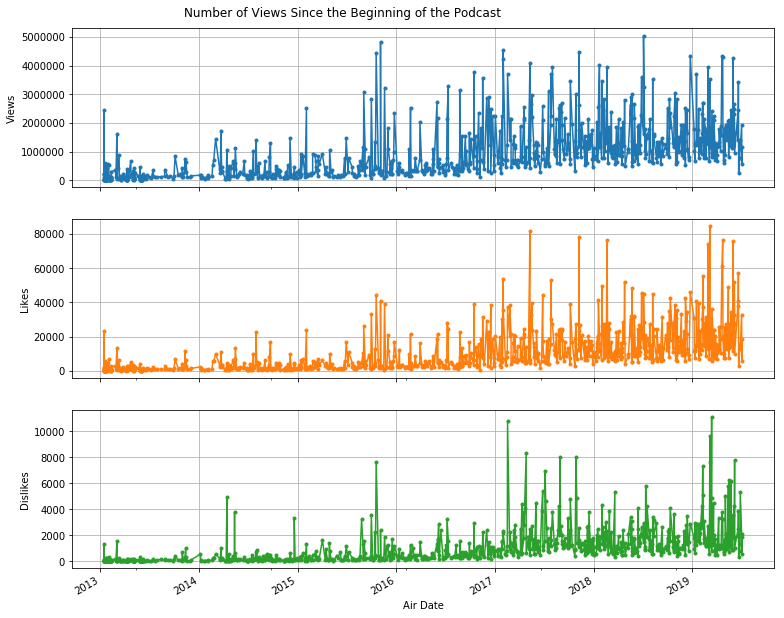

In [135]:
# plot time series of views without outliers
df_or = df[mask_or]


# need to format the plot.  label y axis, and get more tick marks, maybe...
cols = ['views', 'likes', 'dislikes']
ylabels = ['Views', 'Likes', 'Dislikes']
axes = df_or[cols].plot(marker='.', title = 'Number of Views Since the Beginning of the Podcast', figsize=(15,10), subplots = True, legend = False, grid = True)
# There are a few spikes that are interesting.  Who are these people receving so many views?
plt.subplots_adjust(top=.95, left=.25)
#plt.ylabel(['Dislikes', 'Likes', 'Views (10 Mil)'])
i = 0
for ax in axes:
    ax.set_ylabel(ylabels[i])
    ax.set_xlabel('Air Date')
    i += 1

In [157]:
#Histogram
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']
@interact
def histogram_by_col(DropOutliers = False, LastTwoYears = False, Columns=col_list):
    if LastTwoYears:
        start_date = '2017-06'
    else:
        start_date = '2013-01-15'
    if DropOutliers:
        dfthist = dft_or
    else:
        dfthist = dft 
    fs = 15
    axes = dfthist[start_date:'2019-07-04'][Columns].hist( color = 'c',figsize=(8,8))
#     axes.set_ylabel('Count', fontsize = fs)
#     axes.set_xlabel('Views', fontsize = fs)
#     axes.set_title(Columns, fontsize=fs)
    

interactive(children=(Checkbox(value=False, description='DropOutliers'), Checkbox(value=False, description='La…

In [136]:
# barplot 
@interact
def barplot_views_by_cat(DropOutliers = False):
    if DropOutliers:
        dftbar = dft_or
    else:
        dftbar = dft 
    fs = 15
    axes = dftbar.groupby('tag').views.mean().sort_values(ascending=True).plot.barh(color = 'c', fontsize = 15, figsize=(10,10))
    axes.set_ylabel('Guest', fontsize = fs)
    axes.set_xlabel('Views', fontsize = fs)
    axes.set_title('Views by Category', fontsize=fs)
    

interactive(children=(Checkbox(value=False, description='DropOutliers'), Output()), _dom_classes=('widget-inte…

In [144]:



# I want to choose a column from col list and display box plots from specific tags on the same plot.
dft_or = dft[tmask_or]
# how do i select columns for this...?
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']
tag = ['politics', 'athletes-fighters', 'authors', 'comedians', 'filmmakers', 'health', 'journalists', 'miscellaneous', 'musicians', 'politics', 'writers']
#dft_or[dft_or.tag == tag].plot(title = 'Distributions Within %s'%(tag.capitalize()), fontsize=15,  y = col_list, kind='box', layout = (2,3), subplots = True, figsize = (20,8))
@interact
def box_plots_by_col(column=col_list, WithOutliers=False, ShowFliers = False, LastTwoYears = False):
    if LastTwoYears:
        start_date = '2017-06'
    else:
        start_date = '2013-01-15'
    if WithOutliers:
        dftbox=dft
    else:
        dftbox=dft_or
   
    the_plot = dftbox[dftbox.tag.isin(tag)][start_date:'2019-07-04'].boxplot(showfliers = ShowFliers, by = 'tag', column=column, figsize=(20,7), fontsize = 15)
    the_plot.set_title('Distributions Within %s'%(column.capitalize()))
    return the_plot



interactive(children=(Dropdown(description='column', options=('views', 'likes', 'dislikes', 'ratio', 'runtime'…

In [138]:
dft.sort_values(by='airdate', ascending=True)

,ep,ep_title,tag,runtime,views,likes,dislikes,ratio
airdate,,,,,,,,
2013-01-15,310.0,Neil Degrasse Tyson,authors,153.28,2440279,23102,1313,17.59
2013-01-15,304.0,Andrew Dice Clay,comedians,156.70,41814,376,24,15.67
2013-01-15,308.0,Steve Volk,comedians,154.58,13892,127,8,15.88
2013-01-15,310.0,Neil Degrasse Tyson,comedians,153.28,2440279,23102,1313,17.59
2013-01-15,312.0,"Steve Rinella, Bryan Callen",comedians,178.60,110624,748,60,12.47
2013-01-15,312.0,"Steve Rinella, Bryan Callen",actors,178.60,110624,748,60,12.47
2013-01-15,304.0,Andrew Dice Clay,actors,156.70,41814,376,24,15.67
2013-01-16,298.0,Dennis McKenna,authors,159.00,233586,2148,112,19.18
2013-01-16,301.0,Doug Stanhope,comedians,180.40,224684,1276,92,13.87


In [139]:
dft_or = dft[tmask_or]
tag = ['politics', 'athletes-fighters', 'authors', 'comedians', 'filmmakers', 'health', 'journalists', 'miscellaneous', 'musicians', 'politics', 'writers']


@interact

def box_plots(category=dft_or.tag.unique().tolist(), WithOutliers=False, ShowFliers = False):
    if WithOutliers:
        dftbox=dft
    else:
        dftbox=dft_or
    tag = category
    
    the_plot = dftbox[dftbox.tag.isin([tag])].plot(showfliers = ShowFliers, title = 'Distributions Within %s'%(tag.capitalize()), fontsize=15,  y = col_list, kind='box', layout = (2,3), subplots = True, figsize = (20,8))
    return the_plot

interactive(children=(Dropdown(description='category', options=('writers', 'musicians', 'politics', 'models', …

In [140]:
#set up interact to get top views..
col_list = ['views', 'likes', 'dislikes', 'ratio', 'runtime']
@interact
def horz_bar_plot(column = col_list, n=(1, 50), DropOutliers = False):
    if DropOutliers:
        dfbar = df_or
    else:
        dfbar = df 
    
    if n > 30:
        fs = n/2
    else:
        fs = 12
    axes = dfbar.nlargest(n, column).groupby('ep_title')[column].max().sort_values(ascending=True).plot.barh(fontsize=fs, color='b', figsize=(5,fs/2))
    axes.set_ylabel('Guest', fontsize = fs)
    axes.set_xlabel(column, fontsize = fs)
    axes.set_title('Top {} Guests by Number of {}'.format(n, column), fontsize=fs)
    

interactive(children=(Dropdown(description='column', options=('views', 'likes', 'dislikes', 'ratio', 'runtime'…

Further work:
-Explore transformation techniques, especially when dealing with the left-skewed plots.
-Consolidate some of the categories.
